In [1]:
def retrieve_data(*args, debug=False):
    import os,sys
    import pandas as pd
    
    # input parsing
    counties = args
    if len(counties) > 1:
        need_combine = True
        output = []
    else:
        need_combine = False
    
    # constants/defaults
    lookup_file = 'CA_lookup.csv'
    detail_directory = 'data_by_county'
    
    
    # load lookup table
    nearby_files = os.listdir()
    if lookup_file not in nearby_files:
        lookup_file = input('Please enter file path to lookup table\n')
    lookup = pd.read_csv(lookup_file)  
    
    for county in counties:
        # confirm county is in lookup
        if debug: print('looking up %s' % county)
        if lookup['County'].isin([county]).any():
            if debug: print('found %s in %s' % (county,lookup_file))
            detail_file = lookup.loc[lookup['County'] == county,'File Name'].values[0]
                # assumes detail_file command above will pull a singular list. [0] strips list to string.
            if detail_directory not in nearby_files:
                detail_path = input('Please enter the directory to detail files\n')
            detail_path = os.path.join(detail_directory,detail_file)

            # load detail data
            data = pd.read_csv(detail_path)
            if debug: print('%s loaded successfully' % detail_path)
            if need_combine and len(output) > 0:
                output = pd.concat([output,data],axis=0,ignore_index=True)
            else:
                output = data
        else:
            print('%s not in %s' % (county,lookup_file))
    if len(output) > 0:
        return output
    else:
        print('Could not find any county(s) entered.')

In [2]:
def str2unix(s):
    import datetime, time
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())

In [3]:
def convert_timescale(x):
    return x/(60*60*24*365)

In [4]:
def extract_year(x):
    import datetime, time
    return datetime.datetime.strptime(x, "%Y-%m-%d").timetuple().tm_year

In [5]:
def express_as_year(x):
    return convert_timescale(str2unix(x))%1+extract_year(x)

In [16]:
def plot_housing_data(df, **kwargs):
    import matplotlib.pyplot as plt
    import pandas as pd
    
#     defaults
    options = {
        x_metric : 'Date'
        y_metric : 'MedianSoldPricePerSqft_AllHomes'
        plot_options : {
            grid : True
            xlabel : 'Date (yr)'
            ylabel : '$/Sq.Ft.'
            title : 'Median Sold Price per Sq. Ft. Trends'
        }
    }
    
#     Process kwargs
    options.update(kwargs)
    
    entries = df['City'].unique()
    plt.figure(figsize = [20,6])
    for entry in entries:
        this_df = df.loc[df['City']==entry]

        if options['x_metric'] == 'Date':
            x_data = this_df[options['x_metric']].apply(express_as_year)
        else:
            x_data = this_df[options['x_metric']]

        y_data = this_df[options['y_metric']]

        plt.plot(x_data,y_data,'.',label=entry)
    plt.legend()
    plt.grid(options['plot_options']['grid'])
    plt.xlabel(options['plot_options']['xlabel'])
    plt.ylabel(options['plot_options']['yabel'])
    plt.title(options['plot_options']['title'])
    plt.show()

SyntaxError: invalid syntax (<ipython-input-16-5669146e0f7a>, line 8)

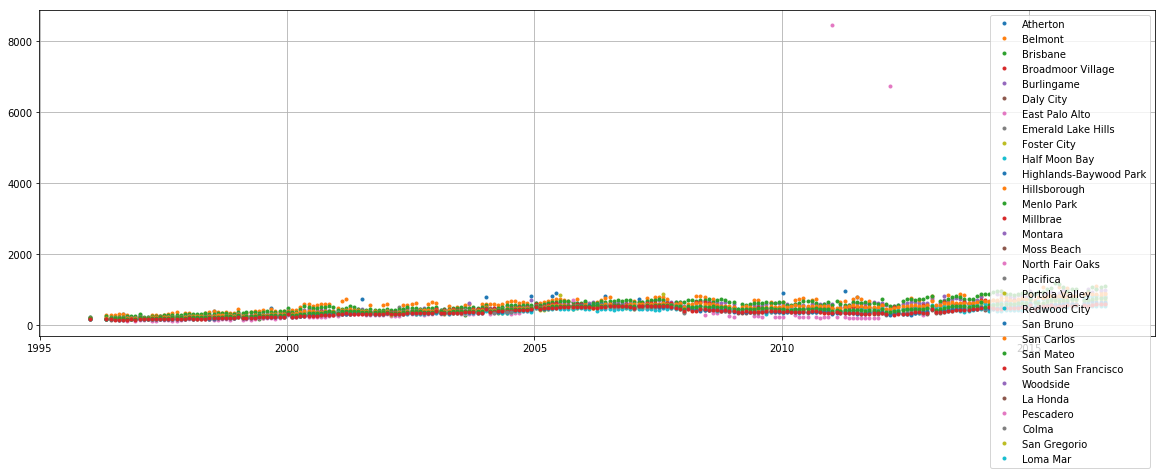

In [15]:
args = ['San Mateo']
result = retrieve_data(*args)
plot_housing_data(result,y_metric = 'MedianSoldPricePerSqft_AllHomes')